In [1]:
from load_data import * 
from analyze_data import * 
import sys
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
from SWRmodule import *
sys.path.append('/home1/efeghhi/ripple_memory/')
from brain_labels import HPC_labels, ENT_labels, PHC_labels, temporal_lobe_labels,\
                        MFG_labels, IFG_labels, nonHPC_MTL_labels, ENTPHC_labels, AMY_labels

############### set parameters ###############
save_data = True
start_time = -2000 # recording start time relative to word onset (ms)
end_time = 2000 # recording end time relative to word onset (ms)
##############################################
catFR_dir = '/scratch/efeghhi/catFR1/ENCODING/'

region_name = '' # if empty string, loads all data
encoding_mode = 1
data_dict = load_data(catFR_dir, region_name=region_name, encoding_mode=encoding_mode)
if encoding_mode:
    data_dict = remove_wrong_length_lists(data_dict)

ca1_elecs = [x for x in HPC_labels if 'ca1' in x]
data_dict_ca1 = select_region(data_dict, ca1_elecs)

/home1/efeghhi/.conda/envs/env3/lib/python3.7/site-packages/ptsa/data/timeseries.py:526: FutureWarning: xarray subclass TimeSeriesX should explicitly define __slots__
  class TimeSeriesX(TimeSeries):


In [2]:
count_num_trials(data_dict_ca1, "ca1")

Number of trials in ca1: 113628


In [3]:
def dict_to_numpy(data_dict, order):
    
    print(f"order: {order}")
    
    dd_trials = {}
    for key, val in data_dict.items():
        dd_trials[key] = []
        for sess in val:
            if key == 'correct':
                sess = np.where(sess>0, 1, 0)
            # non neural data is 2D (num_trials x num_electrodes)
            # values are repeated along each row 
            if len(sess.shape) == 2:
                # reshape here will give us a 1d vector, where data for electrodes for a given trial
                # are placed next to each other 
                dd_trials[key].extend(np.reshape(sess, -1, order=order))
            if len(sess.shape) == 3:
                # for 3d data reshape will do the same thing, meaning that electrodes from the same trial
                # are placed next to each other 
                dd_trials[key].extend(np.reshape(sess, (-1, sess.shape[-1]), order=order))

    for key, val in dd_trials.items():
        dd_trials[key] = np.asarray(val)
        
    return dd_trials

In [4]:
dd_trials = dict_to_numpy(data_dict_ca1, order='C')

order: C


In [5]:
dd_trials['ripple'].shape[0]/12

9469.0

In [6]:
# create ripple exists array
ripple_start = 550
ripple_end = 900
ripple_exists_idxs = np.argwhere(np.sum(dd_trials['ripple'][:, ripple_start:ripple_end],axis=1)>0)
ripple_exists = np.zeros(dd_trials['ripple'].shape[0])
ripple_exists[ripple_exists_idxs] = 1
dd_trials['ripple_exists'] = ripple_exists

In [7]:
if encoding_mode: 
    start_time = -700
    end_time = 2300
    num_bins = 150
    catFR_dir = '/scratch/efeghhi/catFR1/ENCODING/'
    
else:
    start_time = -2000
    end_time = 2000
    num_bins = 200
    catFR_dir = '/scratch/efeghhi/catFR1/IRIonly/'
    
xr = np.linspace(start_time/1000, end_time/1000, num_bins)

ripple_start = 550
ripple_end = 900

/home1/efeghhi/.conda/envs/env3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home1/efeghhi/.conda/envs/env3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home1/efeghhi/.conda/envs/env3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home1/efeghhi/.conda/envs/env3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home1/efeghhi/.conda/envs/env3/lib/python3.7/site-packages/statsmodels/regre

ValueError: x and y must have same first dimension, but have shapes (200,) and (150,)

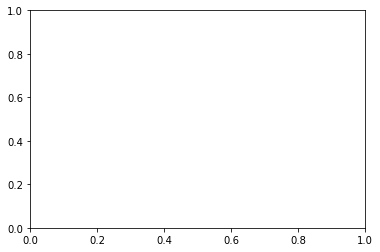

In [8]:
plot_SCE_SME(data_dict=dd_trials, power='HFA', mode=2, region='ca1', xr=xr, encoding_mode=1, behav_key='correct', ymin=-0.25, ymax=1.25)
   